In [1]:
from pandas import DataFrame, read_csv
import pandas as pd 
import numpy as np
import re

In [2]:
from cleaning import *

In [3]:
airbnb = readData()

In [4]:
airbnb = cleanDF(airbnb)

In [5]:
airbnb.columns.tolist()

['activity_type',
 'activity_name',
 'location',
 'duration',
 'includes',
 'language',
 'host_name',
 'host_intro',
 'price',
 'cancel_policy',
 'min_age',
 'No_Ppl',
 'rating',
 'noRev',
 'links',
 'latitude',
 'longtitude',
 'language_count',
 'includes_count']

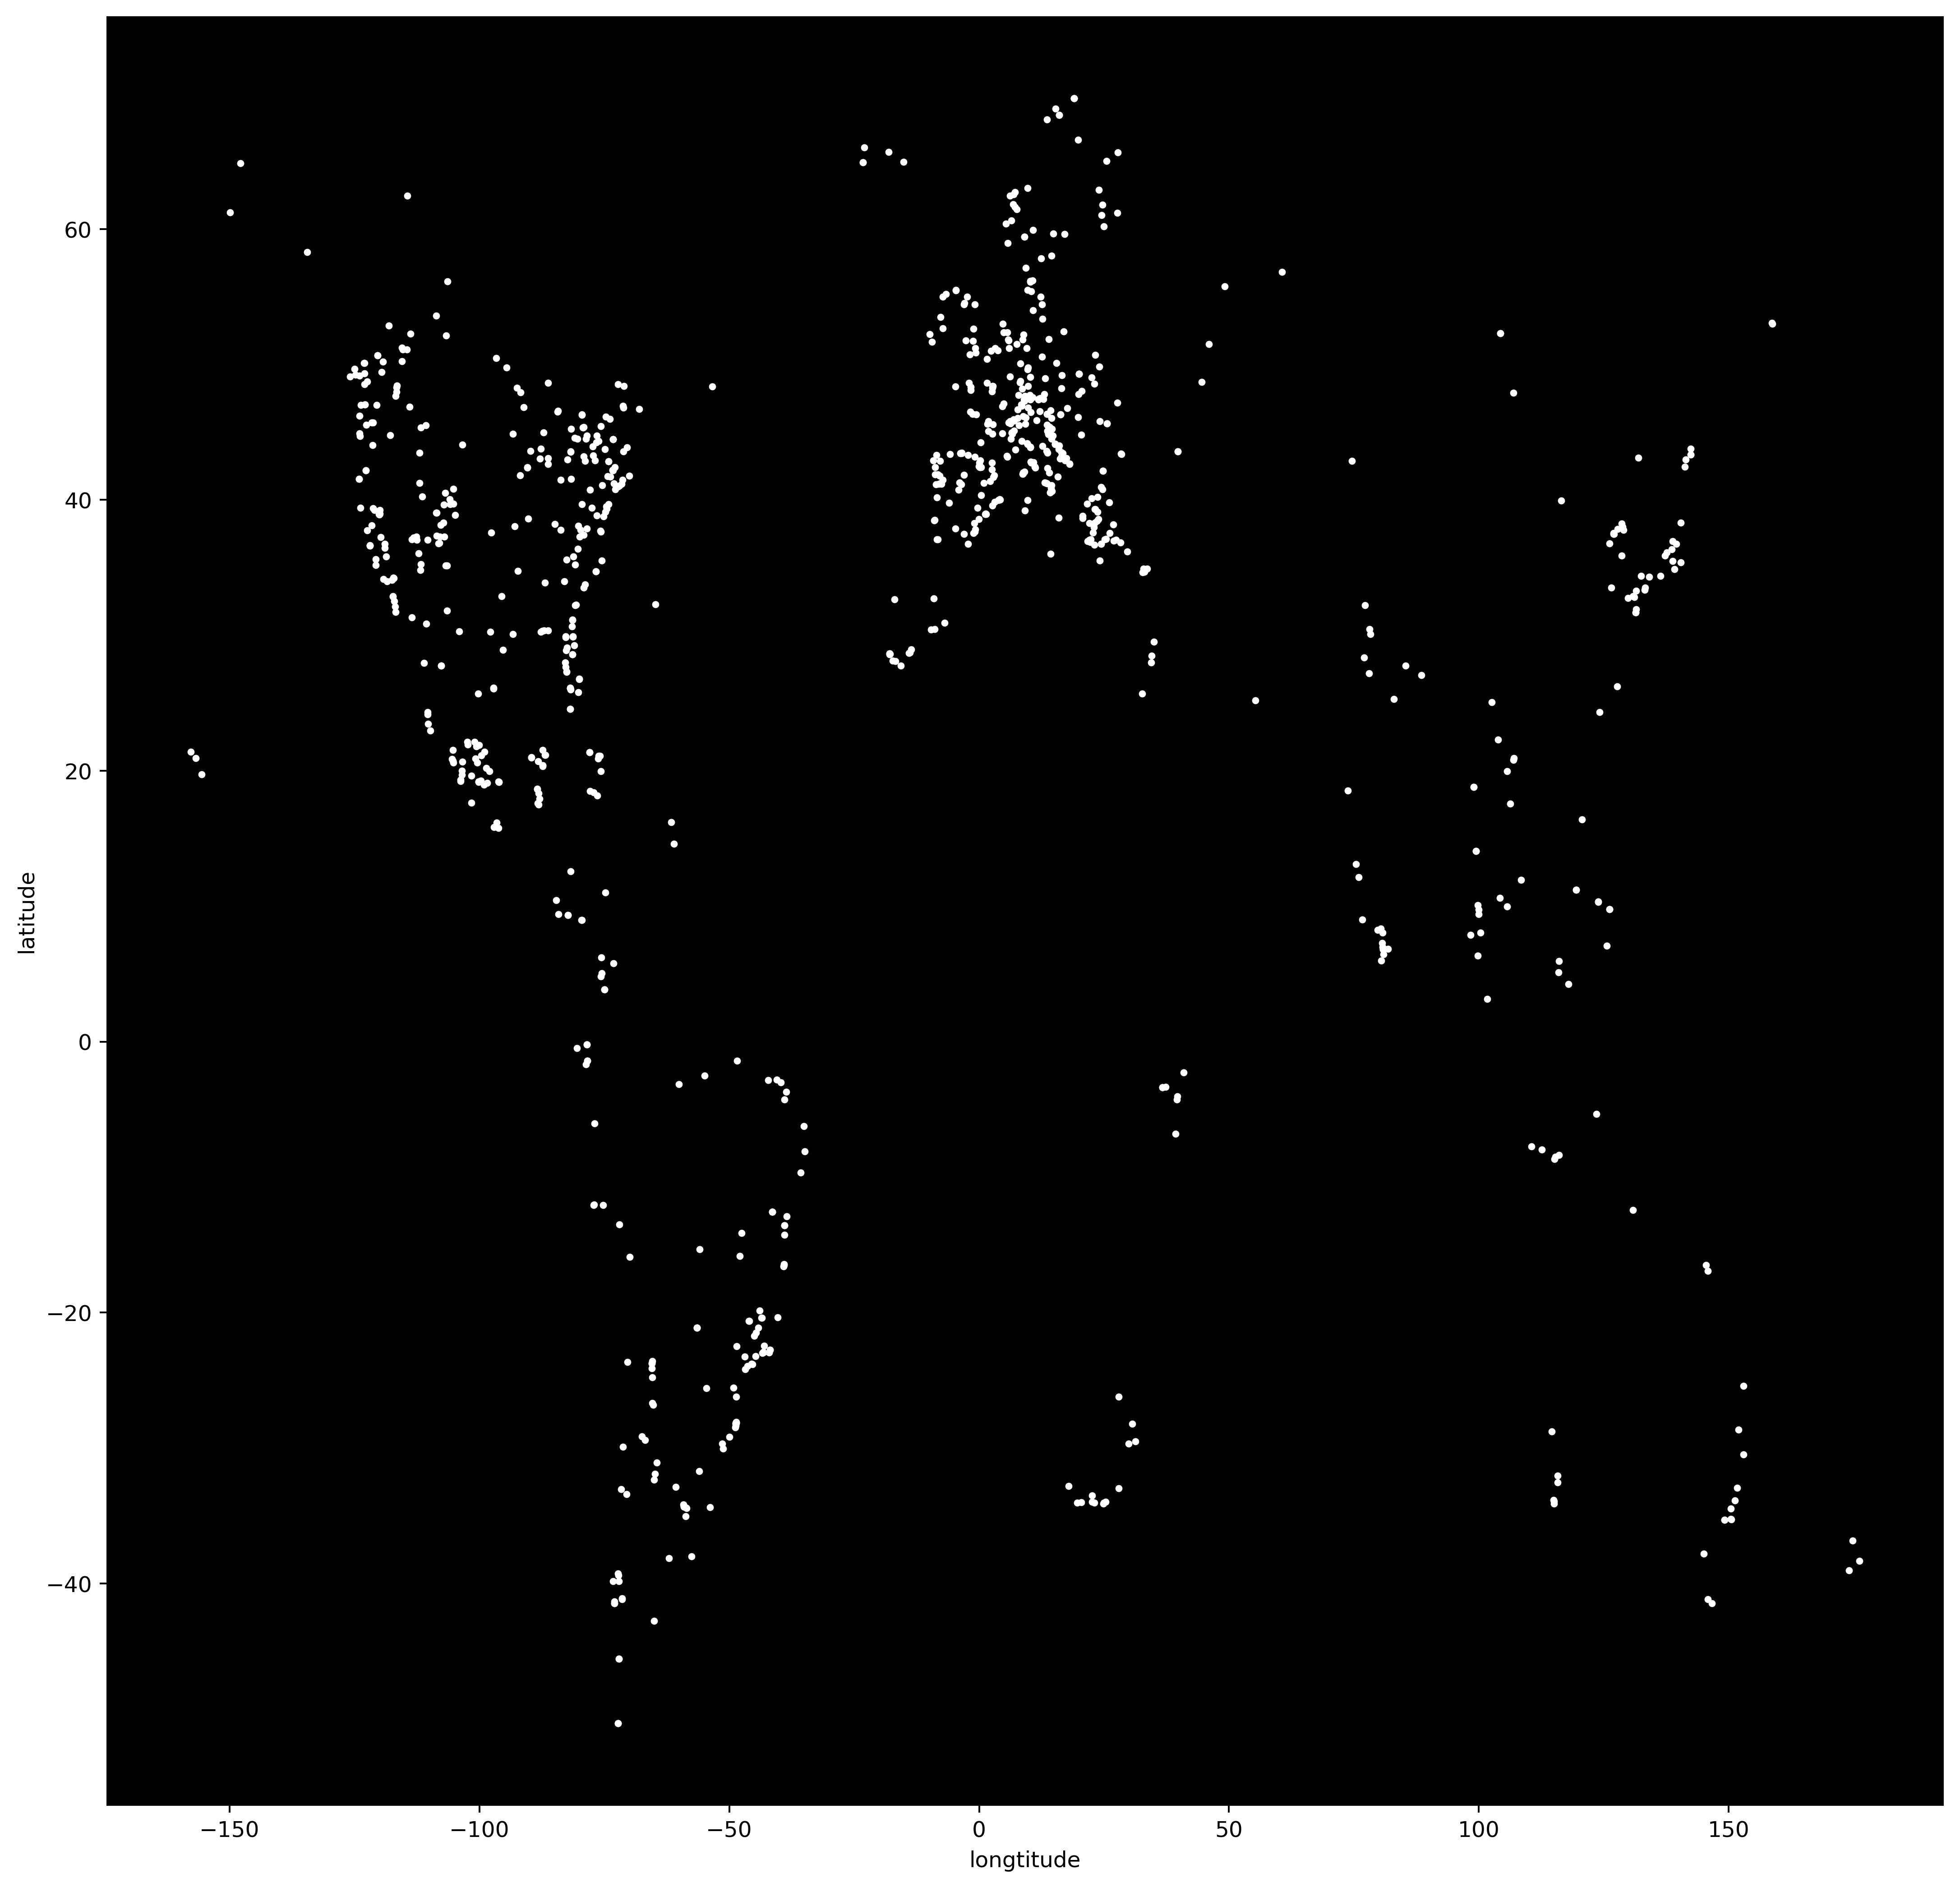

In [6]:
import matplotlib  
import matplotlib.pyplot as plt  
import pandas as pd
%matplotlib inline 

#pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (15, 15) #Size of figure  
rcParams['figure.dpi'] = 350


P=airbnb.plot(kind='scatter', x='longtitude', y='latitude',color='white',s=5,alpha=1)
P.set_facecolor('black') #Background Color

In [7]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()

(0, 500)

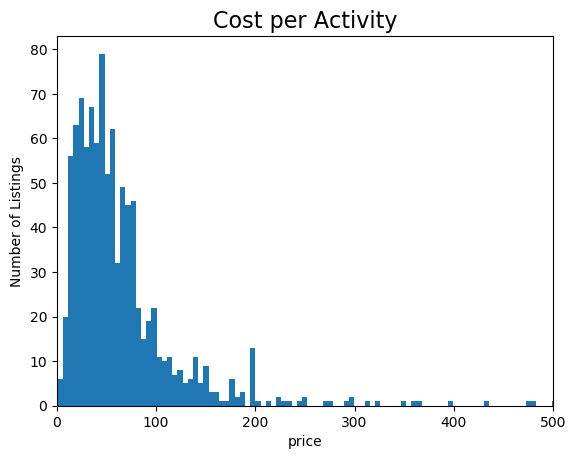

In [8]:
price_hist = plt.hist(airbnb['price'],bins= 100)
plt.xlabel('price')
plt.ylabel('Number of Listings')
plt.title('Cost per Activity', fontsize=16)
plt.xlim(0,500)   

Text(0, 0.5, 'Popularity/Frequency')

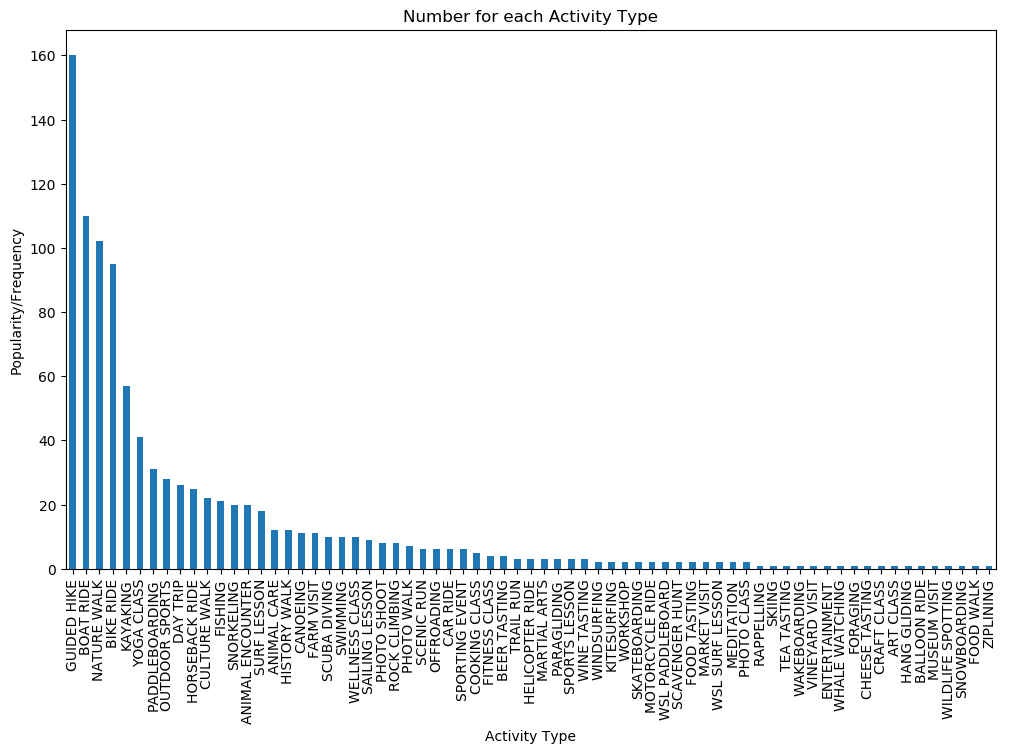

In [9]:
bar_actType = airbnb['activity_type'].value_counts().plot(kind='bar',
                                    figsize=(12,7),
                                    title="Number for each Activity Type")
bar_actType.set_xlabel("Activity Type")
bar_actType.set_ylabel("Popularity/Frequency")

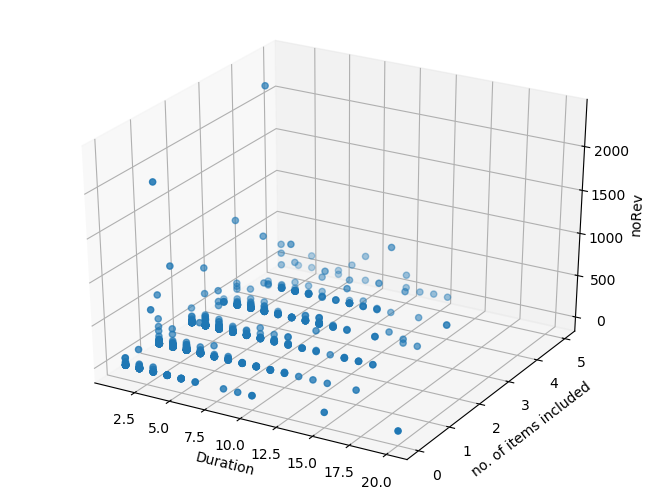

In [525]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(airbnb['duration'], airbnb['includes_count'], airbnb['noRev'])
ax.set_xlabel('Duration')
ax.set_ylabel('no. of items included')
ax.set_zlabel('noRev')
plt.show()

In [12]:
airbnb_no_canPolicy = airbnb.drop('cancel_policy',1)

In [13]:
airbnb_no_canPolicy.columns

Index(['activity_type', 'activity_name', 'location', 'duration', 'includes',
       'language', 'host_name', 'host_intro', 'price', 'min_age', 'No_Ppl',
       'rating', 'noRev', 'links', 'latitude', 'longtitude', 'language_count',
       'includes_count'],
      dtype='object')

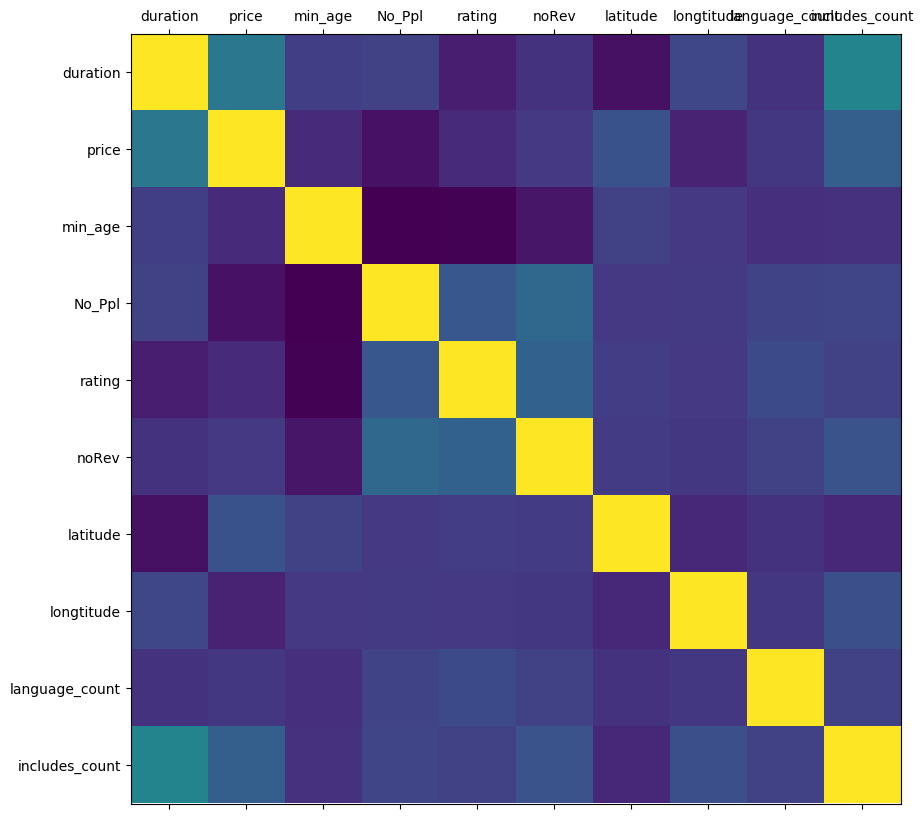

In [14]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(airbnb_no_canPolicy)

In [15]:
airbnb_norm = airbnb_no_canPolicy.drop(['activity_type', 'activity_name', 'location', 'includes','language', 'host_name', 'host_intro','links'],1)

In [16]:
#Normalizing:
from sklearn.preprocessing import MinMaxScaler

listNames = ['duration', 'price', 'min_age', 'No_Ppl','rating', 'noRev', 'latitude', 'longtitude', 'language_count','includes_count']
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(airbnb_norm)
airbnb_Norm = pd.DataFrame(np_scaled)

airbnb_Norm.columns = listNames

print(airbnb_Norm.head(5))
print(airbnb_Norm.columns.values)

   duration     price   min_age    No_Ppl  rating     noRev  latitude  \
0  0.105263  0.103053  0.842105  0.225806     0.0  0.000000  0.732517   
1  0.000000  0.148855  0.421053  0.096774     0.0  0.000000  0.838083   
2  0.578947  0.076336  0.842105  0.096774     0.0  0.000000  0.395856   
3  0.473684  0.082061  0.421053  0.290323     0.0  0.000000  0.314825   
4  0.157895  0.154580  0.263158  0.096774     1.0  0.018251  0.638011   

   longtitude  language_count  includes_count  
0    0.550662        0.142857             0.2  
1    0.126589        0.142857             0.2  
2    0.346006        0.142857             0.6  
3    0.348462        0.142857             0.2  
4    0.854917        0.142857             0.2  
['duration' 'price' 'min_age' 'No_Ppl' 'rating' 'noRev' 'latitude'
 'longtitude' 'language_count' 'includes_count']


/Users/yeyuan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


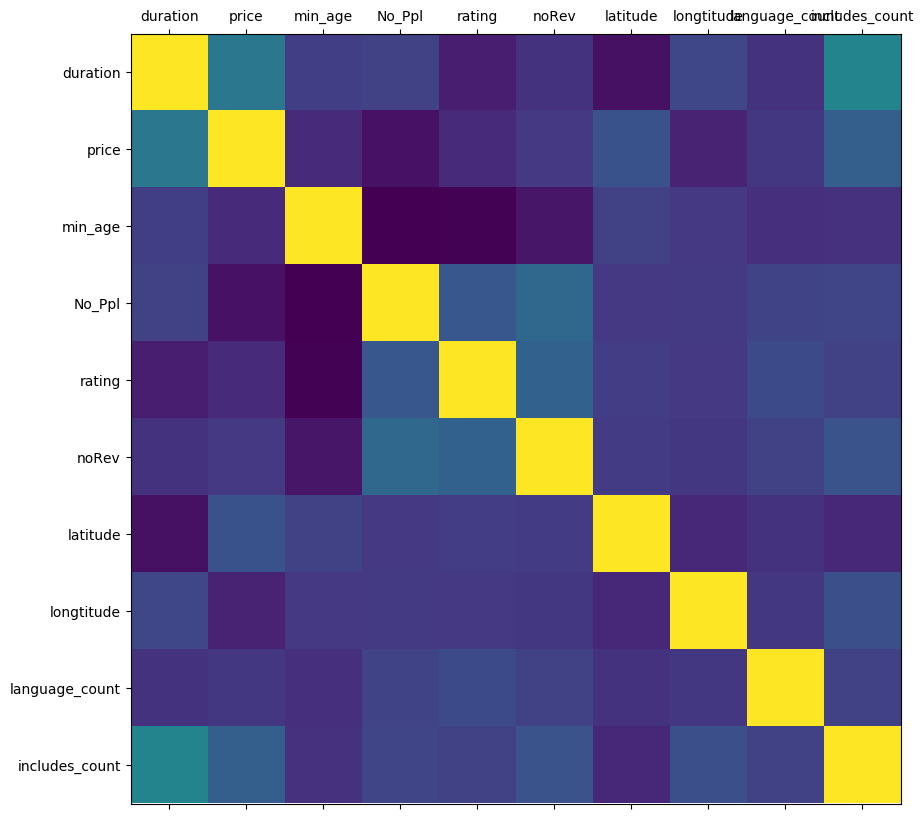

In [17]:
plot_corr(airbnb_Norm)

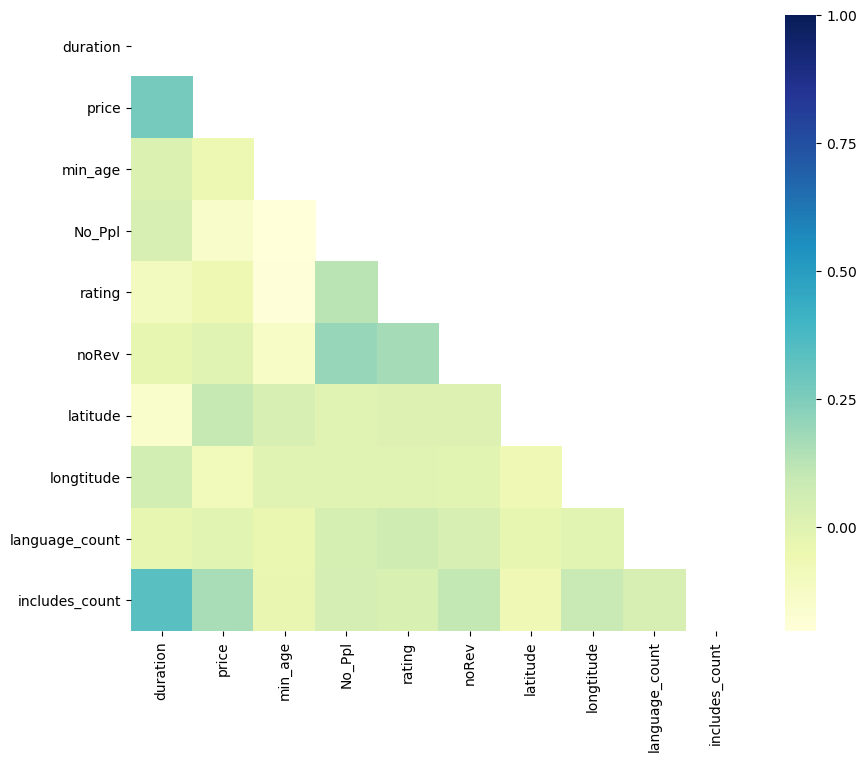

In [18]:
import seaborn as sns
corr = airbnb_Norm.corr()
f, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap="YlGnBu",
           square=True, ax=ax)
plt.show()

In [19]:
corr

,duration,price,min_age,No_Ppl,rating,noRev,latitude,longtitude,language_count,includes_count
duration,1.000000,0.275132,0.021485,0.035499,-0.102081,-0.027430,-0.151028,0.051372,-0.026881,0.340826
price,0.275132,1.000000,-0.055197,-0.143741,-0.059436,-0.002956,0.097782,-0.087988,-0.009639,0.162279
min_age,0.021485,-0.055197,1.000000,-0.202983,-0.195965,-0.131001,0.033640,-0.002392,-0.036950,-0.031579
No_Ppl,0.035499,-0.143741,-0.202983,1.000000,0.125167,0.197331,-0.005542,0.003439,0.041545,0.047268
rating,-0.102081,-0.059436,-0.195965,0.125167,1.000000,0.169788,0.017083,-0.002651,0.066892,0.030812
noRev,-0.027430,-0.002956,-0.131001,0.197331,0.169788,1.000000,0.011052,-0.007255,0.034868,0.104061
latitude,-0.151028,0.097782,0.033640,-0.005542,0.017083,0.011052,1.000000,-0.064266,-0.026766,-0.064160
longtitude,0.051372,-0.087988,-0.002392,0.003439,-0.002651,-0.007255,-0.064266,1.000000,-0.010009,0.092997
language_count,-0.026881,-0.009639,-0.036950,0.041545,0.066892,0.034868,-0.026766,-0.010009,1.000000,0.033868
includes_count,0.340826,0.162279,-0.031579,0.047268,0.030812,0.104061,-0.064160,0.092997,0.033868,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

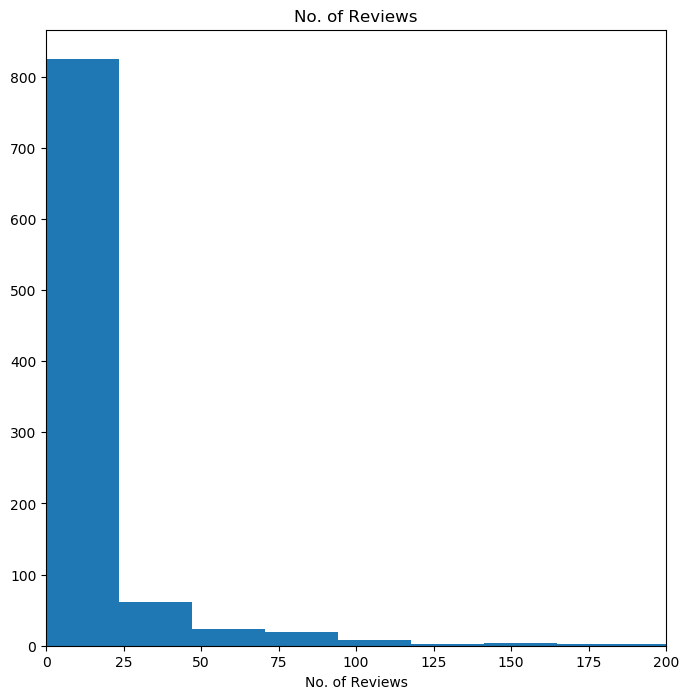

In [20]:
fix, ax = plt.subplots(figsize = (8,8))
price_hist = ax.hist(airbnb['noRev'],bins= 100)
plt.xlabel('No. of Reviews')
plt.ylabel('')
plt.title('No. of Reviews', fontsize=12)
plt.xlim(0,200)  
plt.show

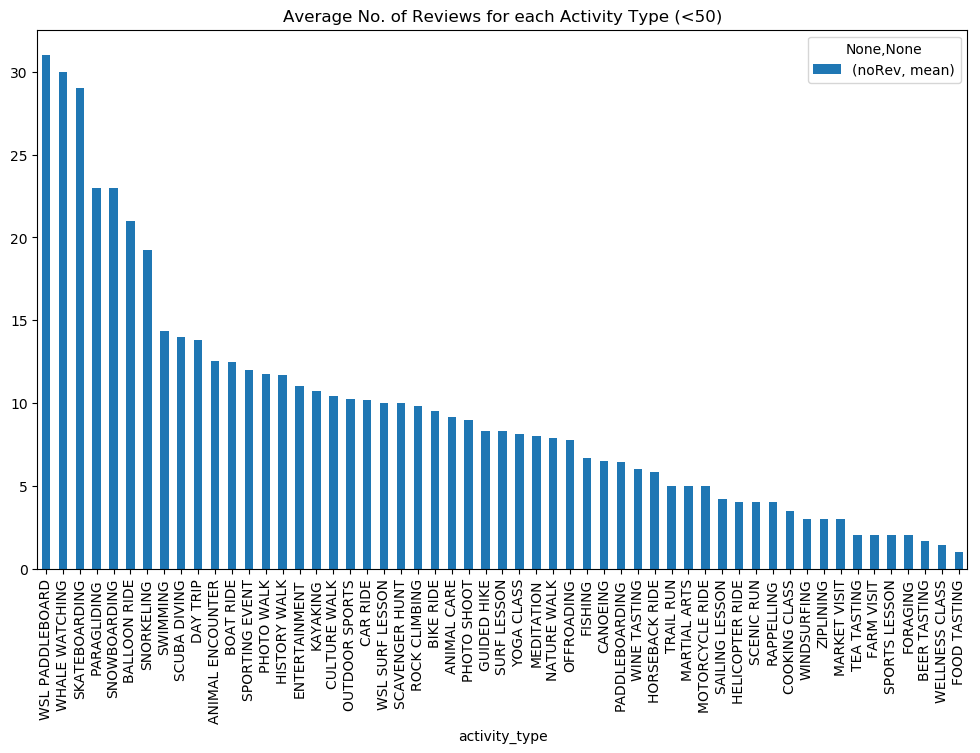

In [210]:
airbnb[(airbnb.noRev < 50) & (airbnb.noRev != 0)].groupby("activity_type").agg({"noRev":["mean"]}).sort_values(by=("noRev","mean"), ascending=False).plot(kind='bar',
                                    figsize=(12,7),
                                    title="Average No. of Reviews for each Activity Type (<50)")

In [429]:
airbnb[airbnb.noRev != 0].groupby("activity_type").agg({"noRev":["sum"]}).sort_values(by=("noRev","sum"),ascending = False)#.plot(kind = 'bar',figsize=(12,7),title="Average No. of Rev. for each Activity Type")

,noRev
,sum
activity_type,
BOAT RIDE,7379.0
GUIDED HIKE,4507.0
KAYAKING,3584.0
DAY TRIP,2789.0
SNORKELING,1702.0
BIKE RIDE,1218.0
SURF LESSON,1116.0
NATURE WALK,1052.0


In [28]:
from urllib.request import urlopen
import json

In [177]:
def country_creation(df,new_colname):
    def country_finder(lat,long):
        geolocator = Nominatim()
        location = geolocator.reverse([lat, long], language="en")
        return location.raw['address'].get('country', np.nan)
    df[new_colname] = df.apply(lambda x: country_finder(x.latitude,x.longtitude), axis = 1)

In [161]:
airbnb.columns

Index(['index', 'activity_type', 'activity_name', 'location', 'duration',
       'includes', 'language', 'host_name', 'host_intro', 'price',
       'cancel_policy', 'min_age', 'No_Ppl', 'rating', 'noRev', 'links',
       'latitude', 'longtitude', 'language_count', 'includes_count',
       'Zimbabwe'],
      dtype='object')

In [187]:
country_creation(airbnb,"country")

/Users/yeyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
airbnb.drop(columns= ['Zimbabwe'], inplace=True)

In [231]:
airbnb[airbnb.noRev != 0].groupby('country').agg({'noRev': 'mean'}).reset_index().sort_values(by='noRev',ascending=False)

,country,noRev
39,Netherlands,1180.000000
64,United Arab Emirates,878.000000
67,United States of America (Middle Hawai'ian Isl...,344.000000
11,Costa Rica,322.000000
25,Indonesia,207.500000
60,Thailand,155.000000
53,South Korea,153.714286
42,PRC,124.000000
66,United States of America (Island of Hawai'i te...,102.000000
44,Peru,96.250000


In [465]:
(airbnb[airbnb.noRev != 0].groupby('activity_type')
 .agg({'noRev': 'sum'})
 .reset_index()
 .sort_values(by="noRev",ascending=False).head(5))

,activity_type,noRev
5,BOAT RIDE,7379.0
16,GUIDED HIKE,4507.0
20,KAYAKING,3584.0
10,DAY TRIP,2789.0
39,SNORKELING,1702.0


In [494]:
actC_graph = pre_actC.assign(rnk_max=pre_actC.groupby(['activity_type'])['noRev'].rank(method='first',ascending = False)).query('rnk_max < 6').sort_values(['activity_type', 'rnk_max'])

In [508]:
?sns.barplot

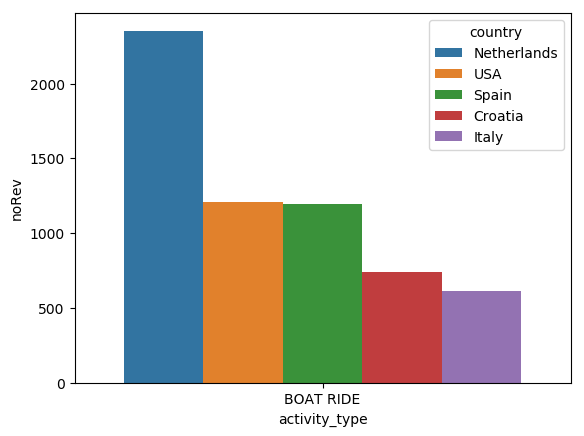

In [511]:
sns.barplot(data = actC_graph[actC_graph.activity_type == 'BOAT RIDE'],x="activity_type",y="noRev",hue="country")

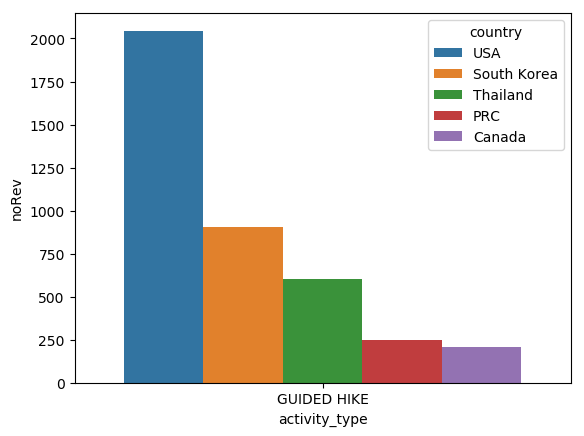

In [512]:
sns.barplot(data = actC_graph[actC_graph.activity_type == 'GUIDED HIKE'],x="activity_type",y="noRev",hue="country")

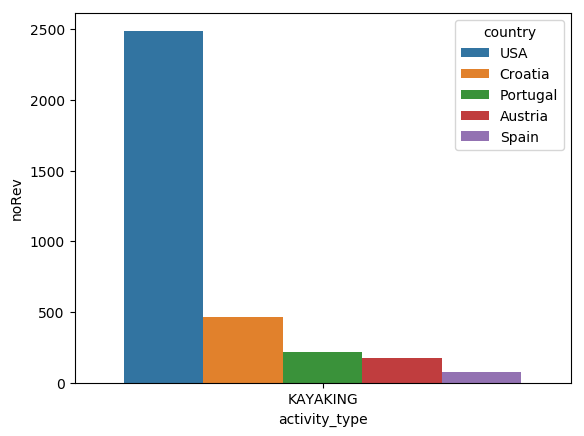

In [513]:
sns.barplot(data = actC_graph[actC_graph.activity_type == 'KAYAKING'],x="activity_type",y="noRev",hue="country")

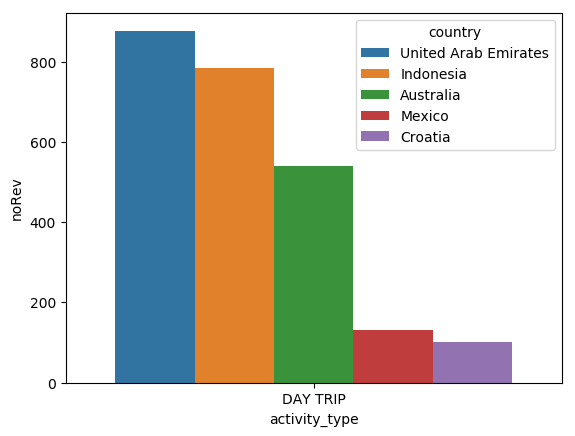

In [514]:
sns.barplot(data = actC_graph[actC_graph.activity_type == 'DAY TRIP'],x="activity_type",y="noRev",hue="country")

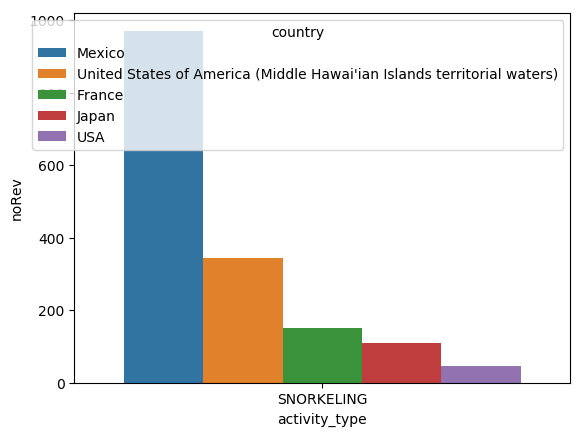

In [515]:
sns.barplot(data = actC_graph[actC_graph.activity_type == 'SNORKELING'],x="activity_type",y="noRev",hue="country")

In [481]:
pre_actC = pd.DataFrame(noZeros[(noZeros.activity_type == 'BOAT RIDE') | (noZeros.activity_type == 'GUIDED HIKE') 
        |(noZeros.activity_type == 'KAYAKING') 
        |(noZeros.activity_type == 'DAY TRIP') | (noZeros.activity_type == 'SNORKELING')]
 .groupby(['activity_type','country'])['noRev'].sum()).reset_index()

In [482]:
pre_actC

,activity_type,country,noRev
0,BOAT RIDE,Argentina,11.0
1,BOAT RIDE,Australia,45.0
2,BOAT RIDE,Brazil,320.0
3,BOAT RIDE,Canada,14.0
4,BOAT RIDE,Colombia,35.0
5,BOAT RIDE,Croatia,743.0
6,BOAT RIDE,France,134.0
7,BOAT RIDE,Greece,34.0
8,BOAT RIDE,Ireland,3.0
9,BOAT RIDE,Italy,616.0


In [387]:
noZeros = airbnb[airbnb.noRev != 0]

In [391]:
def threshPrice(x):
    from scipy.stats import ttest_ind as ttest
    lt = noZeros[noZeros.price < x ].noRev.values
    gt = noZeros[noZeros.price > x ].noRev.values
    return ttest(lt,gt).pvalue

In [392]:
import numpy as np
import pandas as pd

In [393]:
threshs = np.linspace(10,500,100000)
pvals = [threshPrice(x) for x in threshs]

/Users/yeyuan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/yeyuan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 56)

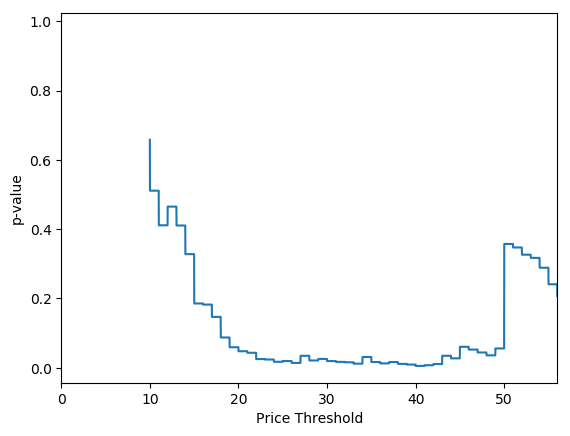

In [404]:
fig, ax = plt.subplots()
sns.lineplot(threshs,pvals, ax=ax)
ax.set_xlabel("Price Threshold")
ax.set_ylabel("p-value")
ax.set_xlim(0,56)

In [395]:
notnulls = ~np.isnan(pvals)

In [396]:
notnull_ps = np.array(pvals)[notnulls]
notnull_threshs = np.array(threshs)[notnulls]

In [397]:
minarg = np.argmin(notnull_ps)

In [398]:
notnull_threshs[minarg]

40.0030000300003

In [399]:
notnull_ps[minarg]

0.005409895964108634

In [454]:
threshPrice(49)

0.043719242031689004

In [433]:
noZeros[noZeros.price<40].noRev.mean()

22.934579439252335

In [436]:
noZeros[noZeros.price>40].noRev.mean()

60.42118863049095

(4, 5)

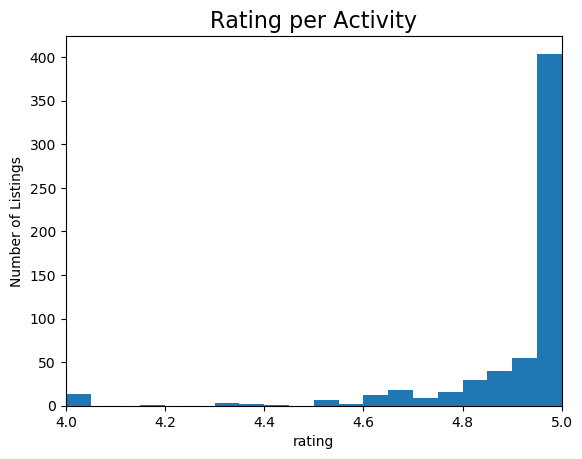

In [451]:
price_hist = plt.hist(noZeros['rating'],bins= 20)
plt.xlabel('rating')
plt.ylabel('Number of Listings')
plt.title('Rating per Activity', fontsize=16)
plt.xlim(4,5)   

In [520]:
def grossRev_creation(df,new_colname):
    df[new_colname] = df.price * df.noRev * 5 * 20e-2

In [521]:
grossRev_creation(noZeros,'grossRev')

/Users/yeyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [523]:
noZeros.grossRev.sum()

1805842.0

In [524]:
(noZeros.groupby('activity_type')
 .agg({'grossRev': 'sum'})
 .reset_index()
 .sort_values(by="grossRev",ascending=False).head(5))

,activity_type,grossRev
5,BOAT RIDE,554627.0
16,GUIDED HIKE,249686.0
10,DAY TRIP,211416.0
20,KAYAKING,169442.0
39,SNORKELING,97217.0
